# Downloading the dataset

In [2]:
!pip install opendatasets --quiet

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od

In [4]:
od.download('https://www.kaggle.com/nikhilmittal/flight-fare-prediction-mh/')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: aakkashsuresh
Your Kaggle Key: ··········


100%|██████████| 626k/626k [00:00<00:00, 52.0MB/s]

In [49]:
df = pd.read_excel('/content/flight-fare-prediction-mh/Data_Train.xlsx')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [51]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [52]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [53]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

# Data Preprocessing

In [54]:
df['travel_day'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.day
df['travel_month'] = pd.to_datetime(df['Date_of_Journey'],format="%d/%m/%Y").dt.month
df.drop(['Date_of_Journey'],axis=1,inplace=True)

In [55]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [56]:
df['dep_hour'] = pd.to_datetime(df['Dep_Time']).dt.hour
df['dep_min'] = pd.to_datetime(df['Dep_Time']).dt.minute
df.drop(['Dep_Time'],axis=1,inplace=True)

In [57]:
df.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month,dep_hour,dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [58]:
df['arr_hour'] = pd.to_datetime(df['Arrival_Time']).dt.hour
df['arr_min'] = pd.to_datetime(df['Arrival_Time']).dt.minute
df.drop(['Arrival_Time'],axis=1,inplace=True)

In [59]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,travel_day,travel_month,dep_hour,dep_min,arr_hour,arr_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [60]:
duration = list(df['Duration'])
for i in range(len(duration)):
  if len(duration[i].split())!=2:
    if "h" in duration[i]:
      duration[i] = duration[i].strip() + ' 0m'
    else:
      duration[i] = "0h " + duration[i]

d_hour = []
d_min = []
for i in range(len(duration)):
  d_hour.append(int(duration[i].split(sep='h')[0]))
  d_min.append(int(duration[i].split(sep='m')[0].split()[-1]))

In [61]:
df['duration_hour'] = d_hour
df['duration_min'] = d_min
df.drop(['Duration'],axis=1,inplace=True)

In [62]:
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,travel_day,travel_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [63]:
df['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [64]:
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,travel_day,travel_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,0.0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2.0,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2.0,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1.0,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1.0,No info,13302,1,3,16,50,21,35,4,45


# Encoding categorical features

In [65]:
df['Airline'].value_counts()

Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: Airline, dtype: int64

In [66]:
airline = pd.get_dummies(df['Airline'],drop_first=True)
df.drop(['Airline'],axis=1,inplace=True)
df = pd.concat([df,airline],axis=1)

In [67]:
df['Source'].value_counts()

Delhi       4537
Kolkata     2871
Banglore    2197
Mumbai       697
Chennai      381
Name: Source, dtype: int64

In [68]:
source = pd.get_dummies(df['Source'],drop_first=True)
df.drop(['Source'],axis=1,inplace=True)
df = pd.concat([df,source],axis=1)

In [69]:
dest = pd.get_dummies(df['Destination'],drop_first=True)
df.drop(['Destination'],axis=1,inplace=True)
df = pd.concat([df,dest],axis=1)

In [70]:
df.drop(['Additional_Info','Route'],inplace=True,axis=1)
df.head()

,Total_Stops,Price,travel_day,travel_month,dep_hour,dep_min,arr_hour,arr_min,duration_hour,duration_min,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0.0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2.0,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2.0,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1.0,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1.0,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [71]:
df.columns

Index(['Total_Stops', 'Price', 'travel_day', 'travel_month', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'duration_hour', 'duration_min',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

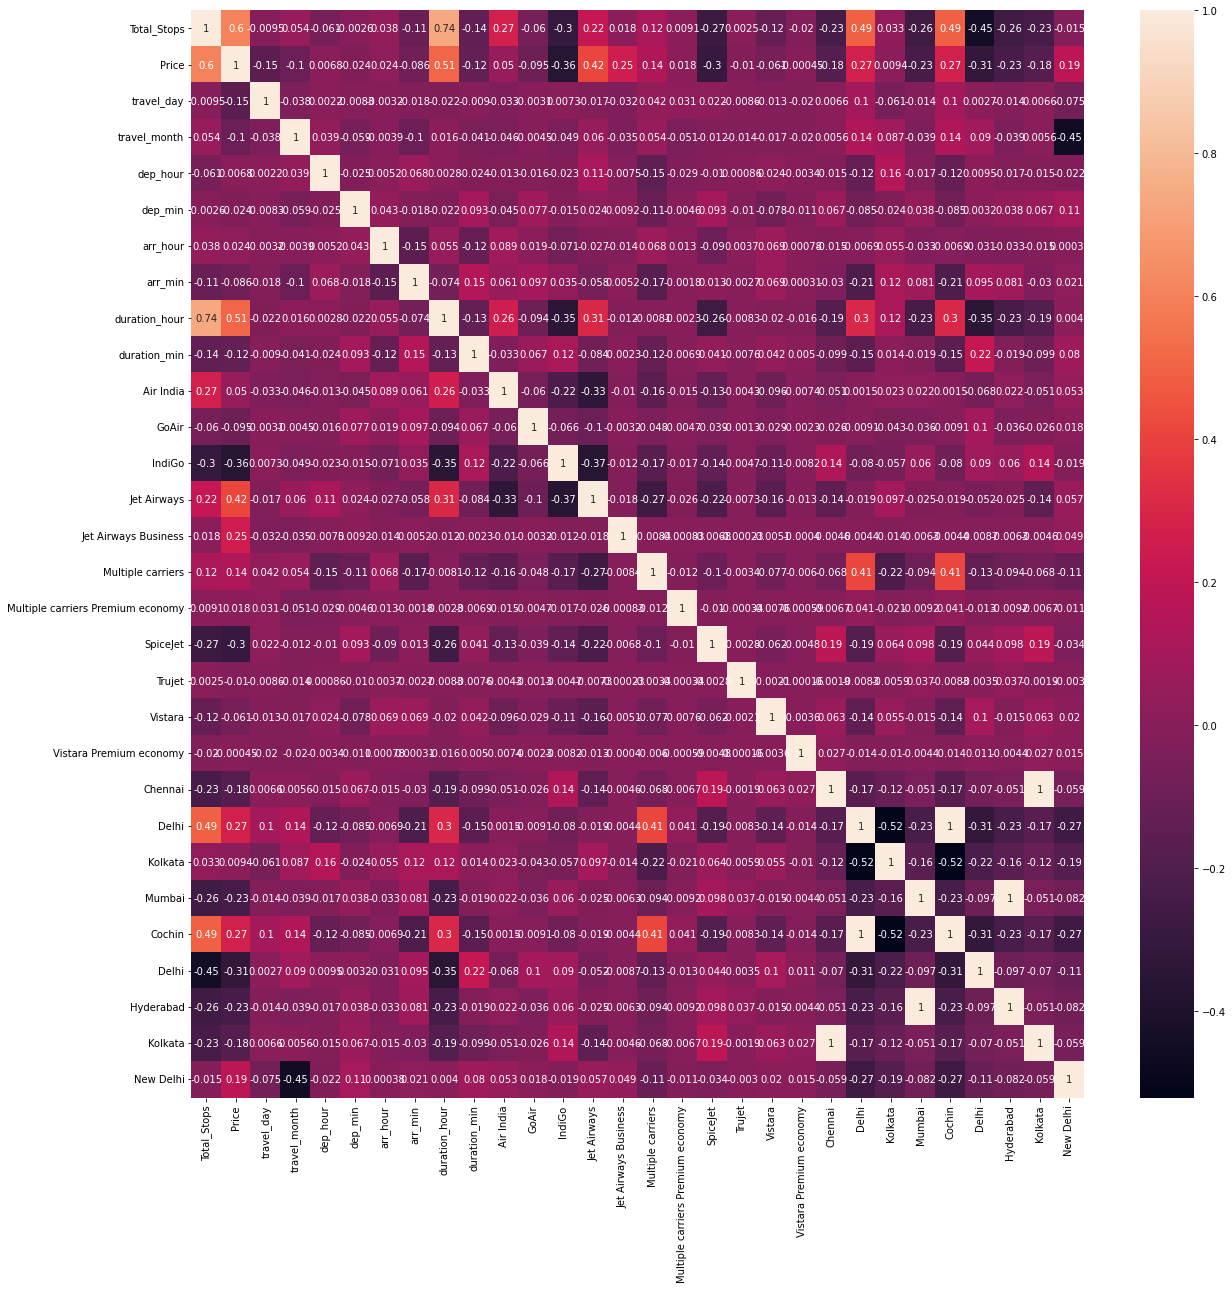

In [74]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

In [76]:
df.columns

Index(['Total_Stops', 'Price', 'travel_day', 'travel_month', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'duration_hour', 'duration_min',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi'],
      dtype='object')

In [85]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

Total_Stops                          0
Price                                0
travel_day                           0
travel_month                         0
dep_hour                             0
dep_min                              0
arr_hour                             0
arr_min                              0
duration_hour                        0
duration_min                         0
Air India                            0
GoAir                                0
IndiGo                               0
Jet Airways                          0
Jet Airways Business                 0
Multiple carriers                    0
Multiple carriers Premium economy    0
SpiceJet                             0
Trujet                               0
Vistara                              0
Vistara Premium economy              0
Chennai                              0
Delhi                                0
Kolkata                              0
Mumbai                               0
Cochin                   

In [86]:
input_col = ['Total_Stops', 'travel_day', 'travel_month', 'dep_hour',
       'dep_min', 'arr_hour', 'arr_min', 'duration_hour', 'duration_min',
       'Air India', 'GoAir', 'IndiGo', 'Jet Airways', 'Jet Airways Business',
       'Multiple carriers', 'Multiple carriers Premium economy', 'SpiceJet',
       'Trujet', 'Vistara', 'Vistara Premium economy', 'Chennai', 'Delhi',
       'Kolkata', 'Mumbai', 'Cochin', 'Delhi', 'Hyderabad', 'Kolkata',
       'New Delhi']
target_col = 'Price'

# Splitting the dataset for training and validation 

In [87]:
from sklearn.model_selection import train_test_split
input_train,input_test,target_train,target_test = train_test_split(df[input_col],df[target_col],test_size=0.2)

In [88]:
input_train.shape,input_test.shape

((8545, 33), (2137, 33))

In [91]:
from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor().fit(df[input_col],df[target_col])

In [92]:
selection.feature_importances_

array([2.32228261e-01, 1.42984899e-01, 5.33882767e-02, 2.38142296e-02,
       2.08697744e-02, 2.80632476e-02, 1.93252646e-02, 1.08504504e-01,
       1.74731872e-02, 9.08402302e-03, 1.94876542e-03, 1.70774417e-02,
       1.46682811e-01, 6.77770201e-02, 1.81999302e-02, 8.80601943e-04,
       2.80153850e-03, 9.85440554e-05, 4.98584048e-03, 8.94909297e-05,
       4.03309894e-04, 9.79060768e-03, 8.54885012e-03, 2.03145452e-03,
       3.52275921e-04, 5.48170284e-03, 5.26120701e-03, 8.03702635e-03,
       8.07421657e-03, 8.81422495e-03, 1.74959268e-03, 3.70893571e-04,
       2.48069867e-02])

# Model

In [93]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor().fit(input_train,target_train)

In [101]:
test_pred = model.predict(input_test)

In [99]:
model.score(input_train,target_train)

0.9554307812093196

In [100]:
model.score(input_test,target_test)

0.7948302093241546

In [103]:
rmse(model.predict(input_train),target_train)

975.3653296029862

In [102]:
def rmse(target,pred):
  return np.sqrt(np.mean(np.square(target-pred)))
rmse(target_test,test_pred)

2072.7076994775625

In [104]:
n_est = [x for x in range(2,500,2)]
max_depth = [x for x in range(2,30,2)]
min_samples_split = [x for x in range(5,100,5)]
min_samples_leaf = [x for x in range(1,20,2)]

In [106]:
param = {'n_estimators': n_est,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}

In [107]:
from sklearn.model_selection import RandomizedSearchCV
random = RandomizedSearchCV(estimator=model,param_distributions = param,scoring='neg_mean_squared_error',n_iter=10,cv=5,verbose=3)

In [108]:
random.fit(input_train,target_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END max_depth=26, min_samples_leaf=11, min_samples_split=65, n_estimators=46;, score=-6473114.024 total time=   0.6s
[CV 2/5] END max_depth=26, min_samples_leaf=11, min_samples_split=65, n_estimators=46;, score=-4280136.154 total time=   0.6s
[CV 3/5] END max_depth=26, min_samples_leaf=11, min_samples_split=65, n_estimators=46;, score=-5809561.280 total time=   0.6s
[CV 4/5] END max_depth=26, min_samples_leaf=11, min_samples_split=65, n_estimators=46;, score=-4997791.234 total time=   0.6s
[CV 5/5] END max_depth=26, min_samples_leaf=11, min_samples_split=65, n_estimators=46;, score=-6047292.883 total time=   0.6s
[CV 1/5] END max_depth=2, min_samples_leaf=15, min_samples_split=70, n_estimators=170;, score=-12819934.141 total time=   0.8s
[CV 2/5] END max_depth=2, min_samples_leaf=15, min_samples_split=70, n_estimators=170;, score=-8987834.984 total time=   0.8s
[CV 3/5] END max_depth=2, min_samples_leaf=15, min_sampl

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(),
                   param_distributions={'max_depth': [2, 4, 6, 8, 10, 12, 14,
                                                      16, 18, 20, 22, 24, 26,
                                                      28],
                                        'min_samples_leaf': [1, 3, 5, 7, 9, 11,
                                                             13, 15, 17, 19],
                                        'min_samples_split': [5, 10, 15, 20, 25,
                                                              30, 35, 40, 45,
                                                              50, 55, 60, 65,
                                                              70, 75, 80, 85,
                                                              90, 95],
                                        'n_estimators': [2, 4, 6, 8, 10, 12, 14,
                                                         16, 18, 20, 22, 24, 26,
                   

In [109]:
random.best_params_

{'max_depth': 18,
 'min_samples_leaf': 1,
 'min_samples_split': 25,
 'n_estimators': 448}

In [110]:
pred = random.predict(input_test)

In [111]:
rmse(target_test,pred)

1998.784944563094

In [113]:
from sklearn.metrics import mean_absolute_error,r2_score
print(r2_score(target_test,pred))
print(mean_absolute_error(target_test,pred))

0.8092039263958464
1205.0856577120562
